# EQUITY VANILLA EUROPEAN-STYLE OPTIONS

Valuation and Risk of a simple Vanilla Equity Option

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.204 - This build:  25 Nov 2021 at 14:53 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



# Define the Call and Put Options

In [3]:
valuation_date = Date(1, 1, 2015)

In [4]:
expiry_date = valuation_date.add_years(0.5)

In [5]:
expiry_date

01-JUL-2015

In [15]:
strike_price = 50.0

In [7]:
call_option = EquityVanillaOption(expiry_date, strike_price, OptionTypes.EUROPEAN_CALL)

In [8]:
put_option = EquityVanillaOption(expiry_date, strike_price, OptionTypes.EUROPEAN_PUT)

In [16]:
stock_price = 50.0
volatility = 0.20
interest_rate = 0.05
dividend_yield = 0.0

In [17]:
discount_curve = DiscountCurveFlat(valuation_date, interest_rate, FrequencyTypes.CONTINUOUS)

In [18]:
dividend_curve = DiscountCurveFlat(valuation_date, dividend_yield)

In [19]:
model = BlackScholes(volatility)

In [21]:
call_option.value(valuation_date, stock_price, discount_curve, dividend_curve, model)

3.4276581469416763

In [14]:
put_option.value(valuation_date, stock_price, discount_curve, dividend_curve, model)

2.2031750852278296

In [15]:
print(call_option)

OBJECT TYPE: EquityVanillaOption
EXPIRY DATE: 01-JUL-2015
STRIKE PRICE: 50
OPTION TYPE: OptionTypes.EUROPEAN_CALL
NUMBER: 1.0


In [16]:
print(put_option)

OBJECT TYPE: EquityVanillaOption
EXPIRY DATE: 01-JUL-2015
STRIKE PRICE: 50
OPTION TYPE: OptionTypes.EUROPEAN_PUT
NUMBER: 1.0


## Risk Measures

You can calculate the risk measures using the exact formulae (x risks) or using perturbatory analysis

In [17]:
call_option.delta(valuation_date, stock_price, discount_curve, dividend_curve, model)

0.5973400425924884

In [18]:
call_option.gamma(valuation_date, stock_price, discount_curve, dividend_curve, model)

0.0549574102554861

In [19]:
call_option.theta(valuation_date, stock_price, discount_curve, dividend_curve, model)

-4.0698377119084395

In [20]:
call_option.rho(valuation_date, stock_price, discount_curve, dividend_curve, model)

13.111017153056368

In [21]:
call_option.vega(valuation_date, stock_price, discount_curve, dividend_curve, model)

13.626426378415047

## Vectorisation

In [22]:
stock_prices = np.linspace(20,80,100)

In [23]:
value = call_option.value(valuation_date, stock_prices, discount_curve, dividend_curve, model)

Text(0, 0.5, 'Option Premium')

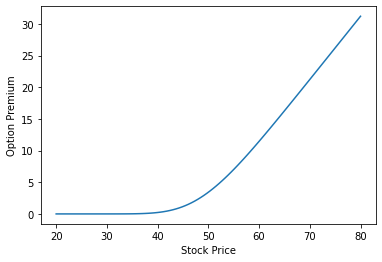

In [24]:
plt.plot(stock_prices, value)
plt.xlabel("Stock Price")
plt.ylabel("Option Premium")

## Risk Measures using Vectorisations

In [27]:
deltas = call_option.delta(valuation_date, stock_prices, discount_curve, dividend_curve, model)

Text(0, 0.5, 'Option Deltas')

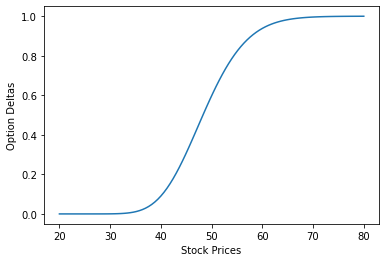

In [28]:
plt.plot(stock_prices, deltas)
plt.xlabel("Stock Prices")
plt.ylabel("Option Deltas")

In [29]:
gammas = call_option.gamma(valuation_date, stock_prices, discount_curve, dividend_curve, model)

Text(0, 0.5, 'Option Gamma')

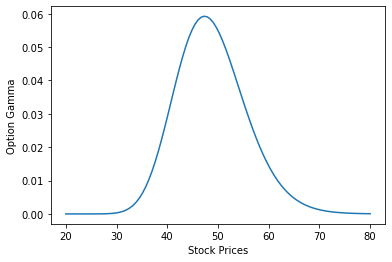

In [30]:
plt.plot(stock_prices, gammas)
plt.xlabel("Stock Prices")
plt.ylabel("Option Gamma")

In [31]:
thetas = call_option.theta(valuation_date, stock_prices, discount_curve, dividend_curve, model)

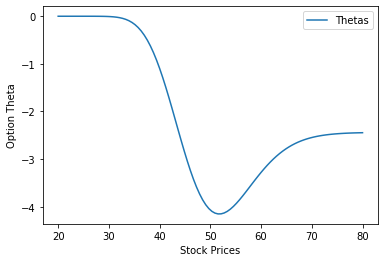

In [32]:
plt.plot(stock_prices, thetas, label="Thetas")
plt.xlabel("Stock Prices")
plt.ylabel("Option Theta")
plt.legend()

In [33]:
rhos = call_option.rho(valuation_date, stock_prices, discount_curve, dividend_curve, model)

Text(0, 0.5, 'Option Rho')

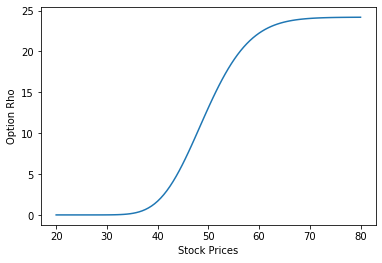

In [34]:
plt.plot(stock_prices, rhos)
plt.xlabel("Stock Prices")
plt.ylabel("Option Rho")

Copyright (c) 2020 Dominic O'Kane